In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# Challenge 1
# This is a dataset about people who are in the criminal justice system of Broward County, FL.
df = pd.read_csv("compas.csv")

In [59]:
# Challenge 2
# The important column to notice is `decile_score`.
# This is the COMPAS score assigned to a defendant.
# It ranges from 1 - 10, where 10 is considered "extremely likely to commit another crime".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

<AxesSubplot:xlabel='age', ylabel='count'>

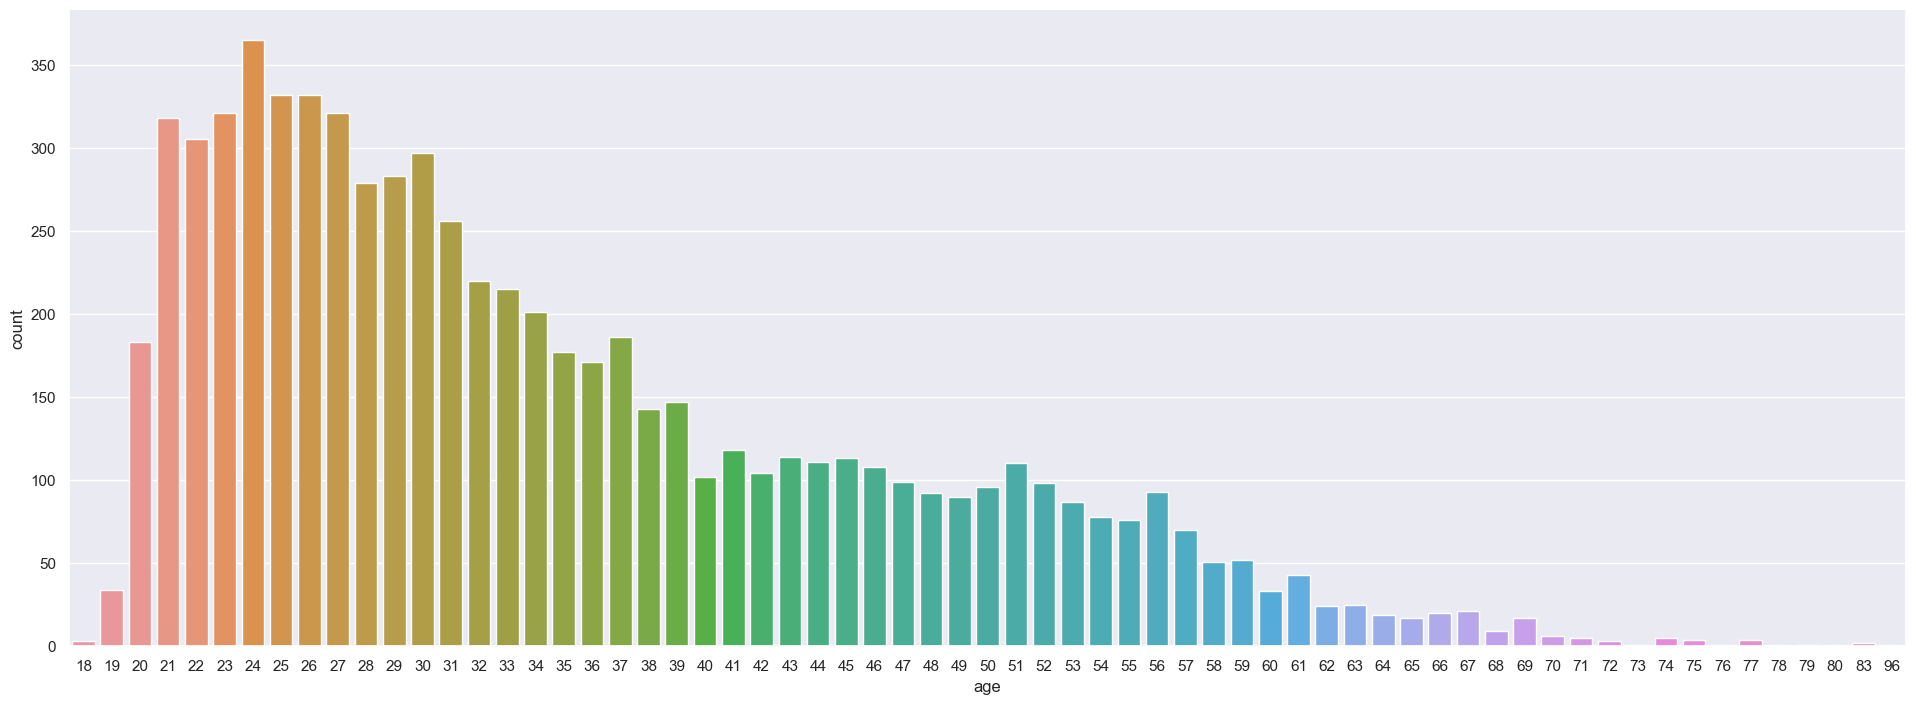

In [60]:
sns.set(rc={'figure.figsize':(23.7,8.27)})
sns.countplot(x=df["sex"])